In [ ]:
import pandas as pd

In [ ]:
estados = pd.read_csv('brasil_estados.csv')
estados

In [ ]:
data = estados[
    [
        'area',
        'populacao',
        'densidade',
        'matricula',
        'idh',
        'receitas',
        'despesas',
        'rendimento',
        'veiculos'
    ]
]
data

In [4]:
data.corr()

,area,populacao,densidade,matricula,idh,receitas,despesas,rendimento,veiculos
area,1.000000,0.045726,-0.375995,0.103052,-0.210447,0.009131,0.012493,-0.242461,-0.022114
populacao,0.045726,1.000000,0.264256,0.994712,0.368471,0.983539,0.981515,0.365265,0.967715
densidade,-0.375995,0.264256,1.000000,0.233783,0.555199,0.291367,0.278740,0.694530,0.241153
matricula,0.103052,0.994712,0.233783,1.000000,0.304599,0.963954,0.962989,0.307704,0.944988
idh,-0.210447,0.368471,0.555199,0.304599,1.000000,0.478499,0.454881,0.947880,0.483255
receitas,0.009131,0.983539,0.291367,0.963954,0.478499,1.000000,0.997481,0.468843,0.991868
despesas,0.012493,0.981515,0.278740,0.962989,0.454881,0.997481,1.000000,0.448210,0.991337
rendimento,-0.242461,0.365265,0.694530,0.307704,0.947880,0.468843,0.448210,1.000000,0.460790
veiculos,-0.022114,0.967715,0.241153,0.944988,0.483255,0.991868,0.991337,0.460790,1.000000


In [5]:
import seaborn as sns

<Axes: xlabel='area', ylabel='populacao'>

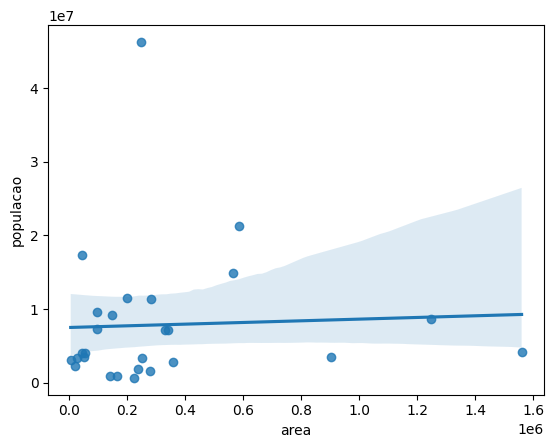

In [6]:
sns.regplot(data=data, x='area', y='populacao')

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif = data[['area', 'densidade', 'idh', 'populacao', 'rendimento']]
vif_data = pd.DataFrame()
vif_data['variavel'] = vif.columns
vif_data['VIF'] = [variance_inflation_factor(vif.values, i) 
    for i in range(len(vif.columns))]
vif_data

,variavel,VIF
0,area,2.061160
1,densidade,3.133636
2,idh,18.104908
3,populacao,2.053911
4,rendimento,23.531576


In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations

In [27]:
tukey = pairwise_tukeyhsd(
    endog=estados['idh'], groups=estados['regiao_nome'], alpha=0.05
)
df_tukey = pd.DataFrame()
combinacao = combinations(tukey.groupsunique,2)
print(list(combinacao))
for grupo in list(combinacao):
    df_tukey = df_tukey.append(
        {'grupo1': grupo[0], 'grupo2': grupo[1]}, ignore_index=True
    )
df_tukey['reject'] = tukey.reject
df_tukey['meandiffs'] = tukey.meandiffs
df_tukey['pvalues'] = tukey.pvalues 
df_tukey   

[('CentroOeste', 'Nordeste'), ('CentroOeste', 'Norte'), ('CentroOeste', 'Sudeste'), ('CentroOeste', 'Sul'), ('Nordeste', 'Norte'), ('Nordeste', 'Sudeste'), ('Nordeste', 'Sul'), ('Norte', 'Sudeste'), ('Norte', 'Sul'), ('Sudeste', 'Sul')]


,reject,meandiffs,pvalues
0,True,-0.093472,0.000046
1,True,-0.069393,0.002701
2,False,0.000500,1.000000
3,False,0.003083,0.999859
4,False,0.024079,0.379291
5,True,0.093972,0.000043
6,True,0.096556,0.000121
7,True,0.069893,0.002512
8,True,0.072476,0.004520
9,False,0.002583,0.999930


In [31]:
tukey = pairwise_tukeyhsd(
    endog=estados['idh'], groups=estados['regiao_nome'], alpha=0.05
)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CentroOeste,Nordeste,-0.0935,0.0,-0.1399,-0.0471,True
CentroOeste,Norte,-0.0694,0.0027,-0.1178,-0.021,True
CentroOeste,Sudeste,0.0005,1.0,-0.0541,0.0551,False
CentroOeste,Sul,0.0031,0.9999,-0.0559,0.0621,False
Nordeste,Norte,0.0241,0.3793,-0.0148,0.063,False
Nordeste,Sudeste,0.094,0.0,0.0476,0.1404,True
Nordeste,Sul,0.0966,0.0001,0.0451,0.148,True
Norte,Sudeste,0.0699,0.0025,0.0215,0.1183,True
Norte,Sul,0.0725,0.0045,0.0192,0.1258,True
Sudeste,Sul,0.0026,0.9999,-0.0564,0.0616,False


<Axes: xlabel='regiao_nome', ylabel='idh'>

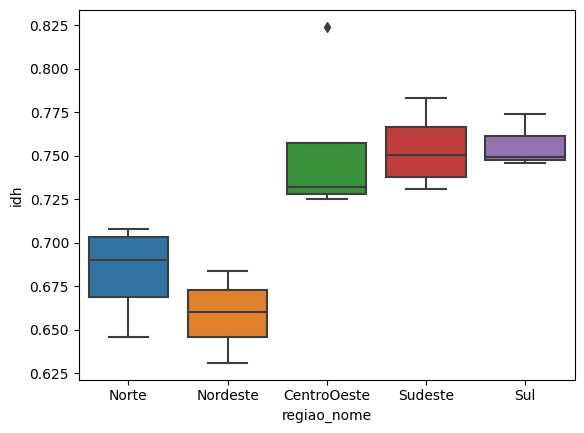

In [33]:
sns.boxplot(data=estados, x='regiao_nome', y='idh')